# Taller: Distribución doblemente acotada 

 Presentado por: Juan Guillermo Acosta

### Objetivo

Modelar la distribución de la matriz origen- destino a partir del modelo gravitacional doblemente acotado.


### Procedimiento
A continuación se explicará paso a paso el procedimiento seguido en este Notebook de Python

### Librerías
Se importa la librería _math_ para las funciones y valores matemáticos a usar, _matplotlib_ para las gráficas, _pandas_ para el manejo de los datos, _numpy_ para operaciones matemáticas y el modulo _optimize_ de _scipy_ para el ajuste de curvas.

In [104]:
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns

### Manejo inicial de los datos

Antes que nada se exporta desde Excel el archivo de los datos como un csv (valores separados por comas). posteriormente usamos _pandas_ para cargar el archivo llamado __DatosTaller2.csv__, indicando que la coma es el separador. Los datos se guardan en la vriable df_i, que es un _DataFrame_ de _pandas_. 

In [2]:
df_i = pd.read_csv("DatosTaller2.csv",sep=",")

A continuación se imprimen las primeras 5 filas de los datos, para ver que todo se haya cargado en orden.

In [3]:
df_i.head()

,ORIGIN,DEST,TIJ,CIJ
0,1,1,10524,28
1,1,2,380,23
2,1,3,807,28
3,1,4,559,24
4,1,5,356,31


Ahora contruimos dos matrices vacías de tamaño $26\times26$, una para almacenar los valores de TIJ que vamos a llamar $\mathbf T $ y otra para almacenar los CIJ que se llamará $\mathbf c $. Se añaden ademas una fila y una columna extra para los $O_i$ y los $D_i$

In [31]:
columns = []                 #lista para almacenar las columnas (destinos)
index = []                   #lista para almacenar las filas (origenes)
ablists = []
for i in range (0,26):
    columns.append(str(i))   # se llenan las listas anteriormente creadas con los numeros de las zonas, del 0 al 25
    index.append(str(i))     # recordar que se hace de esta manera porque los índices en python comienzan en 0. 
    ablists.append(i)
    
C = pd.DataFrame(index = index, columns = columns)  #Se crea nuestra matriz C  
index.append('D')            # Se añade al final una fila para los Di, donde irán las sumas de los destinos
columns.append('O')          # Se añade al final una fila para los Oi, donde irán las sumas de los origenes

T = pd.DataFrame(index = index, columns = columns)  # Se añaden estos "labels" a nuestras matriz T



Aquí, se recorre la tabla inicial brindada y se comienzan a asignar los valores en la casilla correspondiente data por las columnas __ORIGIN__ y __DEST__ de la tabla inicial.

In [32]:
maxLength = int(len(df_i))     # Se establece la longitud de la tabla inicial para saber hasta dónde iterar.  

for i in range (0,maxLength):  # Se itera desde 0 hasta 675.
    x = df_i.iloc[i][0]-1     #Se obtiene el indice de las columnas y se resta 1 para corregir la indexacion de python
    y = df_i.iloc[i][1]-1      # Se obtiene el indice de las filas y se resta 1 para corregir la indexacion de python
    t = df_i.iloc[i][2]        # Se guarda el valor de TIJ
    c = df_i.iloc[i][3]        # Se obtiene el valor de CIJ
    
    T.iloc[x][y] = t           # Se guarda el valor de TIJ en la casilla correspondiente de la matriz T
    C.iloc[x][y] = c           # Se guarda el valor de CIJ en la casilla correspondiente de la matriz C
    
T['O'] = T.sum(axis = 1)       # Se suman los Origenes para almacenarlos en la última columna.
T.iloc[26] = T.sum(axis = 0)   # Se suman los Destinos para almacenarlos en la última fila

Imprimamos las primeras filas de la matriz para verificar que los datos se hayan organizado bien.

In [33]:
T.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,O
0,10524,380,807,559,356,406,795,160,47,224,...,11,71,23,236,167,183,27,389,103,17071.0
1,392,1291,1756,1109,482,1110,2155,436,520,183,...,68,80,76,464,46,266,5,152,143,14644.0
2,857,1793,4430,2659,1243,4952,5210,1552,1848,1159,...,297,535,218,1242,82,434,46,585,579,42581.0
3,502,1097,2713,2873,1615,2155,2254,605,501,544,...,196,301,547,800,70,267,94,322,228,23131.0
4,335,454,1215,1757,5647,2355,3498,782,428,466,...,177,69,172,649,28,281,5,321,236,23901.0


Imprimamos la esquina inferior derecha de la matriz $\mathbf T$ para verificar los destinos

In [34]:
T.iloc[20:27,20:27]

,20,21,22,23,24,25,O
20,2743,2439,958,334,1307,610,37407.0
21,2298,2327,386,102,782,743,15910.0
22,969,395,793,68,1209,643,15779.0
23,343,118,68,2065,1211,366,9237.0
24,1395,886,1195,1150,6014,1932,31166.0
25,541,801,708,368,1804,1635,14769.0
D,37382,15972,15872,9448,31143,14832,716864.0


Imprimamos ahora las primeras filas de la matriz $\mathbf c$ para verificar que haya quedado bien construida

In [35]:
C.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,28,23,28,24,31,35,31,41,22,38,...,39,33,76,55,35,38,48,52,44,41
1,29,26,27,23,39,34,28,40,34,35,...,71,45,35,46,45,35,50,60,67,43
2,31,31,20,24,28,29,24,27,24,29,...,29,28,37,41,44,38,45,41,45,47
3,31,24,24,20,24,29,24,28,27,33,...,38,40,39,35,38,35,48,60,63,53
4,37,38,33,24,22,31,27,28,29,36,...,41,57,41,49,56,43,39,47,52,53


A continuación, creamos una matriz $\mathbf V$ con los mismos $O_i$ y $D_j$ de $\mathbf T$, pero con el resto de entradas $0$

In [36]:
V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

Imprimimos la esquina inferior derecha de la matriz vacía $\mathbf V$ para verificar.

In [37]:
V.iloc[20:27,20:27]

,20,21,22,23,24,25,O
20,0.0,0.0,0.0,0.0,0.0,0.0,37407.0
21,0.0,0.0,0.0,0.0,0.0,0.0,15910.0
22,0.0,0.0,0.0,0.0,0.0,0.0,15779.0
23,0.0,0.0,0.0,0.0,0.0,0.0,9237.0
24,0.0,0.0,0.0,0.0,0.0,0.0,31166.0
25,0.0,0.0,0.0,0.0,0.0,0.0,14769.0
D,37382.0,15972.0,15872.0,9448.0,31143.0,14832.0,716864.0


### Implementación del algoritmo del modelo de gravedad

A continuación se implementará el algoritmo.

Para esto, vamos a comenzar definiendo un parámetro $\alpha = 1.2 $ y un parámetro $\beta = 0.02$, cuyos valores son apenas suposiciones iniciales para comenzar a probar el modelo. 

Posteriormente, definimos tres funciones, llamadas _fexp_, _fpot_, y _fcom_, para referirnos a las funciones exponencial, potencial y compuesta, dependientes de los parámetros $\alpha$ y $\beta$ de la forma

$\begin{equation}
f(c_{ij}) = e^{-\beta c_{ij}}
\end{equation}
$

$\begin{equation}
f(c_{ij}) = (c_{ij})^{-\alpha}
\end{equation}
$

$\begin{equation}
f(c_{ij}) = (c_{ij})^{-\alpha} e^{-\beta c_{ij}}
\end{equation}
$


In [304]:
alpha = 1.2        # parametro alpha                      
beta = 0.02        # parámetro beta

def fexp(i,j):   # se define la función exponencial en terminos de los indices ij
    return m.exp(-1*beta*C.iloc[i,j])

def fpot(i,j):   # se define la función potencial en terminos de los indices ij
    return (C.iloc[i,j])**(-1*alpha)

def fcom(i,j):   # se define la función combinada en terminos de los indices ij
    return ((C.iloc[i,j])**(-1*alpha))*(m.exp(-1*beta*C.iloc[i,j]))


A continuación, creamos dos vectores $A_i$ y $B_j$ de longitud $26$ y los llenamos de $1$. Es importante aclarar que una de las matrices se comenzará a calcular en términos de la otra, por lo que al final solo utilizaremos los $1$ de una de ellas. Adicionalmente, también se crearán arreglos para guardar los $A_i$ y $B_j$ en cada iteración, con el fin de tener un registro de su evolución conforme avanzan los pasos computacionales.

In [39]:
maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

Aquí implementamos el método iterativo que estimará los $A_i$ y $B_j$ de la siguiente manera:

Se asume $B_j = 1$. Posteriormente, se calcula cada $A_i$ con la siguiente ecuación:

$A_i = \dfrac{1}{\sum_j B_j D_j f(c_{ij})} $ 

Para ello se usan dos ciclos _for_ , uno para iterar sobre las $i$ y recorrer cada elemento de $A$ y otro para iterar sobre las $j$ y recorrer cada elemento de $B$ y $D_j$, que no es más que la última fila de $\mathbf T$. Una vez que se han calculado todas las $A_j$, se repite el proceso, pero esta vez iterando primero sobre las $j$ y luego sobre las $i$, empleando la siguiente expresión para calcular los $B_j$

$B_j = \dfrac{1}{\sum_i A_i O_i f(c_{ij})} $ 

Los dos pasos anteriores se repiten varias veces hasta que los $A_i$ y $B_j$ se estabilicen lo suficiente. Para controlar dicha estabilización, vamos a graficar el registro de tres entradas de cada uno de estos vectores en fucnión de cada iteración.

Comenzaremos probando con la función exponencial.

In [40]:
iterac = 20                                              # Se pone el número de iteraciones en 20

for i in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*fexp(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*fexp(i,j)
        B[j] = 1/suma
        
    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])

Grafiquemos los $A_i$ en función de las iteraciones

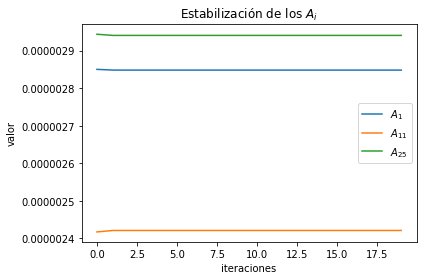

In [41]:
iteraciones = np.linspace(0,iterac-1,iterac)

plt.plot(iteraciones, A1graph, label=r'$A_1$')
plt.plot(iteraciones, A11graph, label=r'$A_{11}$')
plt.plot(iteraciones, A25graph, label=r'$A_{25}$')
plt.title(r'Estabilización de los $A_i$')
plt.xlabel('iteraciones') 
plt.ylabel('valor') 
plt.legend();

Grafiquemos los $B_i$ en función de las iteraciones

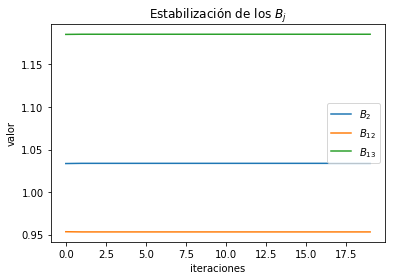

In [42]:
plt.plot(iteraciones, B2graph, label=r'$B_2$')
plt.plot(iteraciones, B12graph, label=r'$B_{12}$')
plt.plot(iteraciones, B24graph, label=r'$B_{13}$')
plt.title(r'Estabilización de los $B_j$')
plt.xlabel('iteraciones') 
plt.ylabel('valor') 
plt.legend();

Como se puede ver, tanto los $A_i$ como los $B_j$ se se estabilizan muy rápido, prácticamente tras el primer paso.

Lo que haremos a continuación será calcular la matriz modelada $\mathbf V$. Esta dependerá de los $A_i$ y $B_j$ de la siguiente manera:

$
V_{ij} = A_i O_i B_j D_j f(c_{ij}) 
$

In [43]:
for i in range (0,maxL):
    for j in range (0,maxL):
        V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fexp(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj

Imprimamos la matriz $\mathbf V$ estimada

In [44]:
V.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,O
0,551.056388,536.172261,1211.442475,724.313453,698.129824,1279.325896,1296.496034,583.605529,956.667092,682.858311,...,286.640930,175.759052,322.348058,908.290244,381.631987,306.249216,190.793399,748.820537,354.705369,17071.0
1,460.734253,430.712049,1054.214621,630.307957,507.445520,1113.287747,1174.273365,507.861904,641.904630,618.484211,...,192.330375,340.392142,329.183769,634.316636,345.654955,250.982566,138.680876,403.220528,290.694177,14644.0
2,1189.017183,1046.807880,3257.164346,1659.496382,1698.414225,3304.808409,3416.820612,1769.178330,2105.905186,1873.067224,...,725.800748,878.450221,977.186080,1738.206625,874.368549,745.044842,544.700645,1681.673249,720.779096,42581.0
3,661.336592,669.734441,1672.362945,999.894757,1023.343887,1838.148988,1900.450669,964.539781,1103.101735,961.710214,...,317.556611,469.439684,612.811677,1090.061902,516.400458,390.264606,207.186002,652.574388,355.566853,23131.0
4,639.490886,551.857973,1522.946591,1006.324106,1161.236084,1925.466974,1951.309125,1051.592034,1155.502613,987.446792,...,246.426936,491.739578,504.953888,829.148446,479.762883,509.400440,292.957161,886.547387,387.657697,23901.0


E imprimamos también la matriz original $\mathbf T$

In [45]:
T.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,O
0,10524,380,807,559,356,406,795,160,47,224,...,11,71,23,236,167,183,27,389,103,17071.0
1,392,1291,1756,1109,482,1110,2155,436,520,183,...,68,80,76,464,46,266,5,152,143,14644.0
2,857,1793,4430,2659,1243,4952,5210,1552,1848,1159,...,297,535,218,1242,82,434,46,585,579,42581.0
3,502,1097,2713,2873,1615,2155,2254,605,501,544,...,196,301,547,800,70,267,94,322,228,23131.0
4,335,454,1215,1757,5647,2355,3498,782,428,466,...,177,69,172,649,28,281,5,321,236,23901.0


Vemos que si bien los $O_i$ cierran perfecto, a simple vista los valores internos de la matriz estan lejos de ser los acertados. Pongamos esto en una visualización donde sea más evidente. Para ello, recompondremos la matriz $\mathbf V$ en un vector (como venía $\mathbf T$ en un principio). De esta forma, podremos comparar los valores uno a uno en una grafica de pares ordenados correspondientes, donde lo ideal sería que ambos fueran iguales siempre y por que por consiguiente, tuvieramos una recta de pendiente $1$.

A continuación, el algoritmo encargado de descomponer la matriz y volverla nuevamente un vector.

In [46]:
rcolumns = ['Origin','Desti','VIJ']             # Se crean las columnas como en la tabla inicial
rindex = []
for i in range (0,676):
    rindex.append(str(i))                       # Se crean 26 x 26 filas

Rexp = pd.DataFrame( index = rindex, columns = rcolumns)            # se asignan esas filas y columnas a una nueva Tabla                    
row = 0                                                          # se establece un contador de filas
for i in range (0,maxL):
    for j in range (0,maxL):                             
        Rexp.iloc[row] = [i+1, j+1, V.iloc[i,j]]                    # se llena la tabla con los valores en V
        row = row + 1
        

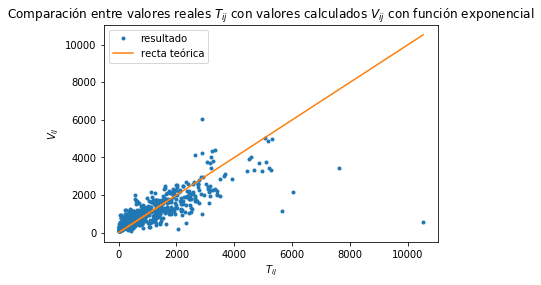

In [47]:
plt.plot(df_i['TIJ'],Rexp['VIJ'],'.', label='resultado')
plt.plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función exponencial')
plt.xlabel(r'$T_{ij}$') 
plt.ylabel(r'$V_{ij}$') 
plt.legend()


Como se puede ver, los valores se distribuyen de manera más o menos equitativa alrededor de la recta teórica, pero observamos valores muy alejados de esta. A continuación vamos a probar el qué se obtiene para las funciones potencial y combinada sin variar $\alpha$ y $\beta$. Simplemente se repetirá todo el codigo anterior variando las funciones, por lo que se copiará el código.

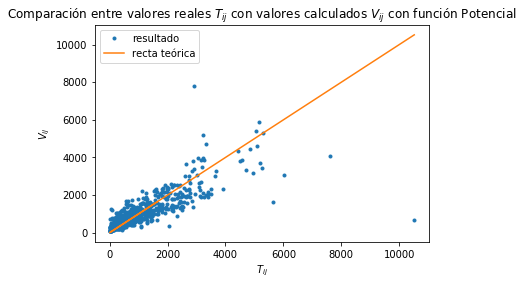

In [21]:
V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

iterac = 20                                              # Se pone el número de iteraciones en 20

for i in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*fpot(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*fpot(i,j)
        B[j] = 1/suma
        
    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])
    
for i in range (0,maxL):
    for j in range (0,maxL):
        V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fpot(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj

rcolumns = ['Origin','Desti','VIJ']             # Se crean las columnas como en la tabla inicial
rindex = []
for i in range (0,676):
    rindex.append(str(i))                       # Se crean 26 x 26 filas

Rpot = pd.DataFrame( index = rindex, columns = rcolumns)            # se asignan esas filas y columnas a una nueva Tabla                    
row = 0                                                          # se establece un contador de filas
for i in range (0,maxL):
    for j in range (0,maxL):                             
        Rpot.iloc[row] = [i+1, j+1, V.iloc[i,j]]                    # se llena la tabla con los valores en V
        row = row + 1
        
plt.plot(df_i['TIJ'],Rpot['VIJ'],'.', label='resultado')
plt.plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función Potencial')
plt.xlabel(r'$T_{ij}$') 
plt.ylabel(r'$V_{ij}$') 
plt.legend()




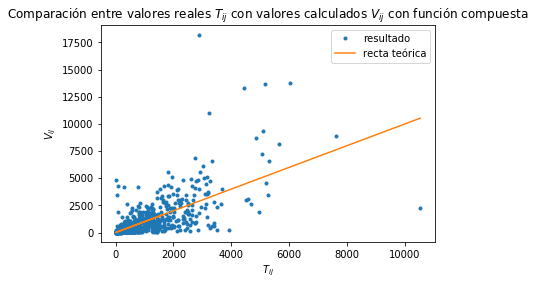

In [303]:
V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

iterac = 20                                              # Se pone el número de iteraciones en 20

for i in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*fcom(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*fcom(i,j)
        B[j] = 1/suma
        
    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])
    
for i in range (0,maxL):
    for j in range (0,maxL):
        V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fcom(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj

rcolumns = ['Origin','Desti','VIJ']             # Se crean las columnas como en la tabla inicial
rindex = []
for i in range (0,676):
    rindex.append(str(i))                       # Se crean 26 x 26 filas

Rcom = pd.DataFrame( index = rindex, columns = rcolumns)            # se asignan esas filas y columnas a una nueva Tabla                    
row = 0                                                          # se establece un contador de filas
for i in range (0,maxL):
    for j in range (0,maxL):                             
        Rcom.iloc[row] = [i+1, j+1, V.iloc[i,j]]                    # se llena la tabla con los valores en V
        row = row + 1
        
plt.plot(df_i['TIJ'],Rcom['VIJ'],'.', label='resultado')
plt.plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función compuesta')
plt.xlabel(r'$T_{ij}$') 
plt.ylabel(r'$V_{ij}$') 
plt.legend()




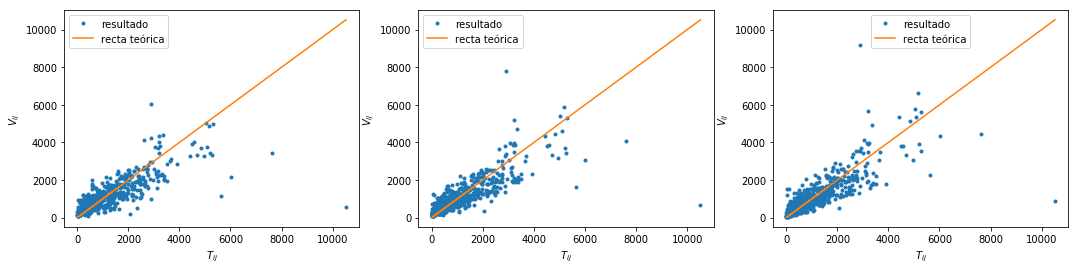

In [23]:
fig, axs = plt.subplots(1,3, figsize=(18,4)) 
axs[0].plot(df_i['TIJ'],Rexp['VIJ'],'.', label='resultado')
axs[0].plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
#plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función compuesta')
axs[0].set_xlabel(r'$T_{ij}$') 
axs[0].set_ylabel(r'$V_{ij}$') 
axs[0].legend()



axs[1].plot(df_i['TIJ'],Rpot['VIJ'],'.', label='resultado')
axs[1].plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
#plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función compuesta')
axs[1].set_xlabel(r'$T_{ij}$') 
axs[1].set_ylabel(r'$V_{ij}$') 
axs[1].legend()



axs[2].plot(df_i['TIJ'],Rcom['VIJ'],'.', label='resultado')
axs[2].plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
#axs[2].title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función compuesta')
axs[2].set_xlabel(r'$T_{ij}$') 
axs[2].set_ylabel(r'$V_{ij}$') 
axs[2].legend()






Calculemos ahora los $R^2$ para cada gráfica.

In [222]:
sumaR1=0
sumaR2=0
for i in range (0,676):
    sumaR1 = sumaR1 + (Rexp.iloc[i,2]-Rexp['VIJ'].mean())**2
    sumaR2 = sumaR2 + (Rexp.iloc[i,2]-df_i.iloc[i,2])**2
print('R2',1-sumaR2/sumaR1)

R2 0.3336106378597319


In [223]:
sumaR1=0
sumaR2=0
for i in range (0,676):
    sumaR1 = sumaR1 + (Rpot.iloc[i,2]-Rpot['VIJ'].mean())**2
    sumaR2 = sumaR2 + (Rpot.iloc[i,2]-df_i.iloc[i,2])**2
print('R2',1-sumaR2/sumaR1)

R2 0.44951752205775564


In [221]:
sumaR1=0
sumaR2=0
for i in range (0,676):
    sumaR1 = sumaR1 + (Rcom.iloc[i,2]-Rcom['VIJ'].mean())**2
    sumaR2 = sumaR2 + (Rcom.iloc[i,2]-df_i.iloc[i,2])**2
print('R2',1-sumaR2/sumaR1)

R2 0.5213004269850985


Como se puede apreciar, los valores de $R^2$ son poco concluyentes, por lo que tendremos que encontrar otras formas de calibrar el modelo. Comencemos por quitar los viajes intrazonales, debido a que por un lado corresponden a los datos más atípicos. Por otro lado, Ortuzar menciona lo pobremente que están representados los costos de los viajes intrazonales, pues se asume que obedecen a la misma dinámica que los viajes etre otras zonas aun cuando se sabe que no es así. Por tal razón se considera apropiado ignorarlos de momento. 

Probemos, además, un método para calibrar el parámetro de la función exponencial. 

## Calibrando los parámetros utilizando el método de Hyman.

El libro de Ortuzar discute un método que se considera eficiente para la calibración de los parámetros. Este método se describirá brevemente a continuación.

### Método de Hyman (como se describe en el Modelling Transport de Ortuzar).

Este método asume una función de costo generalizado de la forma:

$
f(c_{ij})=e^{-\beta c_{ij}}
$

Sea  $ \mathbf V (\beta) $ la matriz de viajes obtenida como función del parámetro $\beta$.
Sean también $ \sum_{ij} V_{ij} (\beta) = V(\beta) $ los viajes totales producto de dicha matriz. 

El método se basa en el siguiente requisito sobre $\beta$

$
c(\beta) = \sum_{ij} \lbrack V_{ij}(\beta) c_{ij} \rbrack/ V(\beta) = c^* = \sum_{ij}(T_{ij}c_{ij})/\sum_{ij}T_{ij}
$

donde $c^*$ es el costo promedio de la matriz origen destino observada (en este caso $\mathbf T$) y $T_{ij}$ es la cantidad de viajes expandidos observados en $\mathbf T$ para cada par origen destino.

De esta forma, el método es descrito así:

1. Se comienza la primera iteración haciendo $m=0$ y estimando $\beta_0=1/c^*$
2. Se usa el valor de $\beta_0$ para calcular la matriz de viajes por medio del modelo de gravedad estándar. Se obtiene el costo promedio de los viajes modelados $c_0$ y se estima un mejor valor de $\beta$ así:

$\beta_m=\beta_0c_0/c^*$

3. Se hace $m = m + 1$. Utilizando el último valor de $\beta$ (es decir $\beta_{m-1}$), se calcula la matriz de viajes usando el modelo de gravedad estándar y se obtiene un nuevo costo promedio de los viajes modelados $c_{m-1}$ y se compara con $c^*$. Si son lo suficientemente parecidos, se acepta $\beta_{m-1}$ como el mejor estimado para este parámetro, de lo contrario, se sigue al paso 4. 

4. Se obtiene un mejor estimado para $\beta$ así:

$\beta_{m+1} = \frac{(c^*-c_{m-1})\beta_m-(c^*-c_m)\beta_{m-1}}{c_m-c_{m-1}}$ 

5. Se repiten los pasos 3 y 4 tanto como sea necesario, osea, hasta que $c_{m-1}$ y $c^*$ sean lo suficientemente parecidos. 

### Aplicación del método de Hyman.

Corramos ahora los pasos descritos anteriormente para estimar un mejor valor para $\beta$.


Comencemos calculando $c^*$, que es el costo promedio de la matriz origen destino observada $\mathbf T$. Para ello, tenemos que calcular $\sum_{ij} \lbrack T_{ij}(\beta) c_{ij} \rbrack/ T(\beta)$. También calculamos $c_0$, que es $\sum_{ij} \lbrack V_{ij}(\beta) c_{ij} \rbrack/ V(\beta)$

Vemos que la diferencia porcentual entre $c^*$ y $c_0$ es del $2.76\%$. Veamos si puede hacerse más pequeña.

Estimamos $\beta_0 = 1/c^*$, osea $\beta_0 = 0.034$. Posteriormente, corremos el modelo:

In [307]:
beta = 0.02
beta_m_1 = 0
beta_m = 0
beta_0 = 0
c_m_1 = 0
c_m = 0
c_0 = 0

hymx = []
hymy = []

for i in range (0,10):
    hymx.append(i)
    if (i == 0):
        beta = 0.02
    if (i == 1):
        beta_0 = 1/c_ast
        beta = beta_0
    if (i == 2):
        beta_m = beta_0*c_0/c_ast
        beta = beta_m
    if (i == 3):
        beta_m_1 = beta_0
        beta_m = beta
        beta = ((c_ast-c_m_1)*beta_m-(c_ast-c_m)*beta_m_1)/(c_m-c_m_1)
    if (i > 3):
        beta_m_1 = beta_m
        beta_m = beta
        beta = ((c_ast-c_m_1)*beta_m-(c_ast-c_m)*beta_m_1)/(c_m-c_m_1)  
    

    def fexph(i,j,be):   # se define la función exponencial en terminos de los indices ij
        return m.exp(-1*be*C.iloc[i,j])


    V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
    V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
    V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

    maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

    A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
    B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

    iterac = 3                                             # Se pone el número de iteraciones en 20
    
    for i in range (0,iterac):                               
        for i in range (0,maxL):
            suma = 0
            for j in range (0,maxL):
                suma = suma + V.iloc[maxL,j]*B[j]*fexph(i,j,beta)
            A[i] = 1/suma

        for j in range (0,maxL):
            suma = 0
            for i in range (0,maxL):
                suma = suma + V.iloc[i,maxL]*A[i]*fexph(i,j,beta)
            B[j] = 1/suma


    for i in range (0,maxL):
        for j in range (0,maxL):
            if(i==j):
                V.iloc[i][j] = 0
            else:
                V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fexph(i,j,beta) # cálculo de los Vij de acuerdo a la formula

    V['O'] = 0                       # refrescamos los Oi
    V.iloc[maxL] = 0                 # refrescamos los Dj
    V['O'] = V.sum(axis = 1)         # Se calculan los Oi
    V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj


    suma = 0  
    suma2 = 0  
    for i in range (0,maxL):
        for j in range (0,maxL):
            suma = suma + T.iloc[i,j]*C.iloc[i,j] # se multiplica cada Tij por cada Cij y se suma con el anterior
            suma2 = suma2 + V.iloc[i,j]*C.iloc[i,j]

    c_ast = suma/T.iloc[maxL,maxL]  # se divide toda la suma anterior por el total de viajes. 
       
    if (i == 0):
        c_0 = suma2/V.iloc[maxL,maxL] 
    if (i == 1):
        c_m_1 = c_0
        c_m = suma2/V.iloc[maxL,maxL]
    if (i > 2):
        c_m_1 = c_m
        c_m = suma2/V.iloc[maxL,maxL]

    c_0 = suma2/V.iloc[maxL,maxL]   
    diff = (abs(c_ast-c_0)/(c_ast))*100
    hymy.append(diff)
    print('beta = ',beta)
    print('diff = ',diff)

beta =  0.02
diff =  17.318965816070467
beta =  0.03705443155316676
diff =  14.561999028589945
beta =  0.04245029751598843
diff =  13.720371597062869
beta =  0.13041473798524514
diff =  2.444531870956544
beta =  0.1494848811817741
diff =  0.6136752380592297
beta =  0.15587690252067807
diff =  0.04322090872445521
beta =  0.15636119890804304
diff =  0.0008408492795095113
beta =  0.1563708076786233
diff =  1.181548829436642e-06
beta =  0.15637082119972362
diff =  3.2200070016246904e-11
beta =  0.1563708212000921
diff =  1.184794072552012e-13


Como se puede ver, la diferencia entre $c^*$ y $c_0$ se vuelve prácticamente nula después de 10 iteraciones, dejándonos con  $\beta = 0.15635380651621175$. Podemos graficar este comportamiento de la diferencia porcentual entre $c^*$ y $c_0$ como función de las iteraciones así:

Text(0.5,1,'Diferencia porcentual entre $c^*$ y $c_0$ como función de iteraciones')

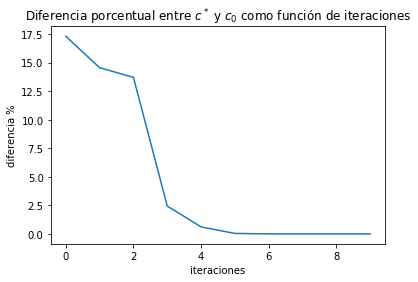

In [308]:
plt.plot(hymx,hymy)
plt.xlabel(r'iteraciones') 
plt.ylabel(r'diferencia %') 
plt.title(r'Diferencia porcentual entre $c^*$ y $c_0$ como función de iteraciones')



Corramos el modelo con el $\beta$ hallado y quitando los viajes intrazonales

In [309]:
beta = 0.15635380651621175
 

def fexp(i,j):   # se define la función exponencial en terminos de los indices ij
    return m.exp(-1*beta*C.iloc[i,j])



V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

iterac = 20                                              # Se pone el número de iteraciones en 20

for i in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*fexp(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*fexp(i,j)
        B[j] = 1/suma

    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])

for i in range (0,maxL):
    for j in range (0,maxL):
        if(i==j):
            V.iloc[i,j] = 0
        else:
            V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fexp(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj


suma = 0  
suma2 = 0  
for i in range (0,maxL):
    for j in range (0,maxL):
        suma = suma + T.iloc[i,j]*C.iloc[i,j] # se multiplica cada Tij por cada Cij y se suma con el anterior
        suma2 = suma2 + V.iloc[i,j]*C.iloc[i,j]

c_ast = suma/T.iloc[maxL,maxL]  # se divide toda la suma anterior por el total de viajes. 


c_0 = suma2/V.iloc[maxL,maxL] 

print('c* = ',c_ast)
print('c0 = ',c_0)


c* =  26.98732535041514
c0 =  26.987325350415176


Grafiquemos las diferencias

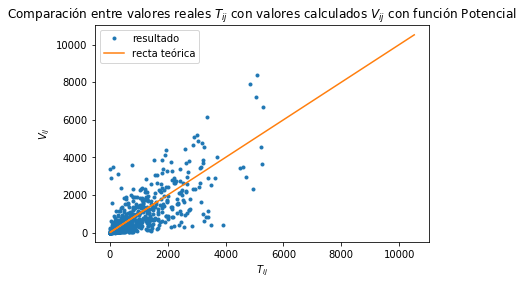

In [310]:
rcolumns = ['Origin','Desti','VIJ','TIJ']             # Se crean las columnas como en la tabla inicial
rindex = []
for i in range (0,676):
    rindex.append(str(i))                       # Se crean 26 x 26 filas

Rexp = pd.DataFrame( index = rindex, columns = rcolumns)            # se asignan esas filas y columnas a una nueva Tabla                    
row = 0                                                          # se establece un contador de filas
for i in range (0,maxL):
    for j in range (0,maxL):                             
        Rexp.iloc[row] = [i+1, j+1, V.iloc[i,j],T.iloc[i,j]]                    # se llena la tabla con los valores en V
        row = row + 1
        
plt.plot(Rexp['TIJ'],Rexp['VIJ'],'.', label='resultado')
plt.plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función Potencial')
plt.xlabel(r'$T_{ij}$') 
plt.ylabel(r'$V_{ij}$') 
plt.legend()



In [312]:
sumaR1=0
sumaR2=0
sumaR1 = sumaR1 + (Rexp['VIJ']-Rexp['VIJ'].mean())**2
sumaR2 = sumaR2 + (Rexp['VIJ']-Rexp['TIJ'])**2
print('R2',1-sumaR2.sum()/sumaR1.sum())

R2 0.5412044765337085


## Comentarios finales:

Se obtiene que si bien se logró encontrar un coeficiente $\beta$ para el cual la función exponencial satisfaciera la condición 

$
c(\beta) = \sum_{ij} \lbrack V_{ij}(\beta) c_{ij} \rbrack/ V(\beta) = c^* = \sum_{ij}(T_{ij}c_{ij})/\sum_{ij}T_{ij}
$

el $R^2$ al que conlleva no es conlcuyente de ninguna manera, y por medio de ensayo y error se llega a que un $\beta = 0.042$ conlleva a resultados mucho mejores $R^2 = 0.73$ (anexo abajo). También se intento separar la función de costo generalizado en dos curvas distintas y en una cantidad de bines determinada, pero se encuentra que si bien la cantidad de parámetros puede collevar a una solución más exacta, el calibrarlos se torna más difícil, por lo que se conlcuye que la mejor función para modelar la situación es la exponencial con el valor $\beta = 0.042$.

Sería interesante estudiar a futuro el por qué la condicion de Hyman cierra pero no conlleva al coeficiente esperado. 



# Anexo 1. Prueba con valor empírico 

In [313]:
beta = 0.042
 

def fexp(i,j):   # se define la función exponencial en terminos de los indices ij
    return m.exp(-1*beta*C.iloc[i,j])



V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores

A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

iterac = 20                                              # Se pone el número de iteraciones en 20

for i in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*fexp(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*fexp(i,j)
        B[j] = 1/suma

    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])

for i in range (0,maxL):
    for j in range (0,maxL):
        if(i==j):
            V.iloc[i,j] = 0
        else:
            V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*fexp(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj


suma = 0  
suma2 = 0  
for i in range (0,maxL):
    for j in range (0,maxL):
        suma = suma + T.iloc[i,j]*C.iloc[i,j] # se multiplica cada Tij por cada Cij y se suma con el anterior
        suma2 = suma2 + V.iloc[i,j]*C.iloc[i,j]

c_ast = suma/T.iloc[maxL,maxL]  # se divide toda la suma anterior por el total de viajes. 


c_0 = suma2/V.iloc[maxL,maxL] 

print('c* = ',c_ast)
print('c0 = ',c_0)

c* =  26.98732535041514
c0 =  30.708880642094435


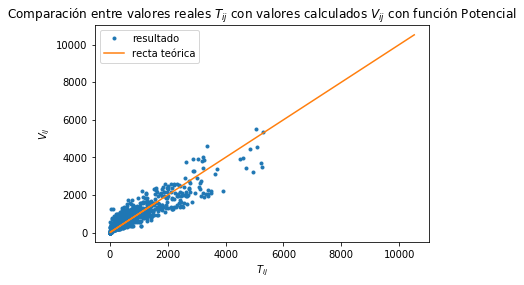

In [314]:
rcolumns = ['Origin','Desti','VIJ','TIJ']             # Se crean las columnas como en la tabla inicial
rindex = []
for i in range (0,676):
    rindex.append(str(i))                       # Se crean 26 x 26 filas

Rexp = pd.DataFrame( index = rindex, columns = rcolumns)            # se asignan esas filas y columnas a una nueva Tabla                    
row = 0                                                          # se establece un contador de filas
for i in range (0,maxL):
    for j in range (0,maxL):                             
        Rexp.iloc[row] = [i+1, j+1, V.iloc[i,j],T.iloc[i,j]]                    # se llena la tabla con los valores en V
        row = row + 1
        
plt.plot(Rexp['TIJ'],Rexp['VIJ'],'.', label='resultado')
plt.plot(df_i['TIJ'],df_i['TIJ'], label='recta teórica')
plt.title(r'Comparación entre valores reales $T_{ij}$ con valores calculados $V_{ij}$ con función Potencial')
plt.xlabel(r'$T_{ij}$') 
plt.ylabel(r'$V_{ij}$') 
plt.legend()




In [315]:
sumaR1=0
sumaR2=0
sumaR1 = sumaR1 + (Rexp['VIJ']-Rexp['VIJ'].mean())**2
sumaR2 = sumaR2 + (Rexp['VIJ']-Rexp['TIJ'])**2
print('R2',1-sumaR2.sum()/sumaR1.sum())

R2 0.7347133172909348


# Anexo 2. Prueba con bines y varias curvas al histograma

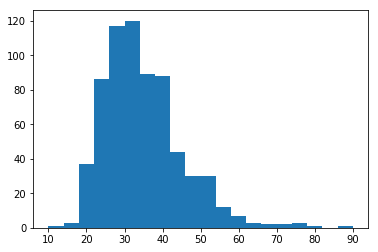

In [106]:
bin_heights, bin_borders,_ = plt.hist(df_i['CIJ'],bins=20)

In [191]:
def Fbins(i,j):
    x = C.iloc[i,j]
    for z in range(0,len(bin_borders)-1):
        if (bin_borders[z]<=x and bin_borders[z+1]>=x):
            return bin_heights[z]
            break

In [192]:
C.iloc[25][2]

50

In [193]:
Fbins(25,2)

30.0

In [194]:
V = pd.DataFrame(0,index = index, columns = columns) # Creamos V con ceros y le damos las mismas filas y columnas de T
V.iloc[26] = T.iloc[26]                              # Le asignamos los Oi de T
V.iloc[:,26] = T.iloc[:,26]                          # Le asignamos los Dj de T

maxL = int(m.sqrt(maxLength))      # Se define una variable para la longitud de los vectores
print(maxL)
A = pd.Series(1.0, index=ablists)  # Se llena la matriz A de 1s
B = pd.Series(1.0, index=ablists)  # Se llena la matriz B de 1s

A1graph = []                       # Se crean arreglos para guardar evolucion temporal de A
A11graph = []
A25graph = []

B2graph = []                       # Se crean arreglos para guardar evolucion temporal de B
B12graph = []
B24graph = []

iterac = 20                                              # Se pone el número de iteraciones en 20

for z in range (0,iterac):                               
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + V.iloc[maxL,j]*B[j]*Fbins(i,j)
        A[i] = 1/suma

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + V.iloc[i,maxL]*A[i]*Fbins(i,j)
        B[j] = 1/suma

    A1graph.append(A[1])                               # Se guardan os registros para graficar
    A11graph.append(A[11])
    A25graph.append(A[25])
    B2graph.append(B[2])
    B12graph.append(B[12])
    B24graph.append(B[24])

for i in range (0,maxL):
    for j in range (0,maxL):
        V.iloc[i][j] = V.iloc[maxL][j]*V.iloc[i][maxL]*A[i]*B[j]*Fbins(i,j) # cálculo de los Vij de acuerdo a la formula

V['O'] = 0                       # refrescamos los Oi
V.iloc[maxL] = 0                 # refrescamos los Dj
V['O'] = V.sum(axis = 1)         # Se calculan los Oi
V.iloc[maxL] = V.sum(axis = 0)   # Se calculan los Dj




26


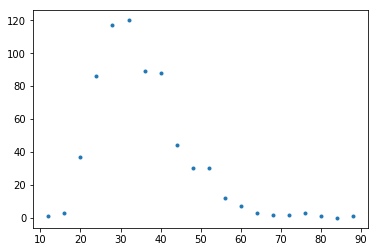

In [172]:
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers, bin_heights,".")

alpha =  2.5674133089560494
beta =  0.13143145318108593


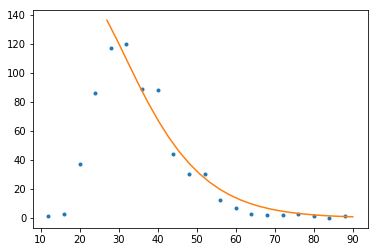

In [217]:
pares = list(zip(bin_centers, bin_heights))
newpares = list(filter(lambda x : x[0] > 25, pares))
xdata,ydata = zip(*newpares)
xinterval = np.linspace(27,90,25)

popt1,_ = curve_fit(lambda t,a,b: (t**a)*np.exp(-1*b*t),  xdata,  ydata,  p0=(1.2, 0.02))
print('alpha = ', popt1[0])
print('beta = ',popt1[1])

plt.plot(bin_centers, bin_heights,".")
plt.plot(xinterval, (xinterval**popt1[0])*np.exp(-1*popt1[1]*xinterval))

alpha =  -0.8882722400097314
beta =  -0.3037831780133804


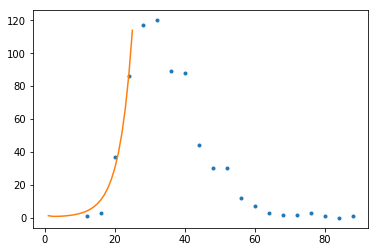

In [184]:
newpares2 = list(filter(lambda x : x[0] < 25, pares))
xdata2,ydata2 = zip(*newpares2)
xinterval2 = np.linspace(1,25,25)
popt2,_ = curve_fit(lambda t,a,b: (t**a)*np.exp(-1*b*t),  xdata2,  ydata2,  p0=(1.2, 0.02))

print('alpha = ', popt2[0])
print('beta = ',popt2[1])
plt.plot(bin_centers, bin_heights,".")
plt.plot(xinterval2, (xinterval2**popt2[0])*np.exp(-1*popt2[1]*xinterval2))

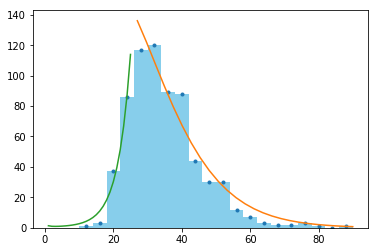

In [186]:
plt.plot(bin_centers, bin_heights,".")
plt.hist(df_i['CIJ'],bins=20, color='skyblue')
plt.plot(xinterval, (xinterval**popt1[0])*np.exp(-1*popt1[1]*xinterval))
plt.plot(xinterval2, (xinterval2**popt2[0])*np.exp(-1*popt2[1]*xinterval2))

In [227]:
def fdef(i,j):
    x = C.iloc[i,j]
    #print('x = ', x)
    if (x > 25):
        #print(x ,' > 25')
        return (x**popt1[0])*np.exp(-1*popt1[1]*x)
    else:
        #print(x ,' < 25')
        return (x**popt2[0])*np.exp(-1*popt2[1]*x)
    

In [228]:
A = pd.Series(1.0, index=ablists)
B = pd.Series(1.0, index=ablists)
Agraph = []
iter = 10

for i in range (0,iter):
    for i in range (0,maxL):
        suma = 0
        for j in range (0,maxL):
            suma = suma + M.iloc[maxL,j]*B[j]*fdef(i,j)
        A[i] = 1/suma
        #print (A[i])
    #print(A[0])

    for j in range (0,maxL):
        suma = 0
        for i in range (0,maxL):
            suma = suma + M.iloc[i,maxL]*A[i]*fdef(i,j)
            #print(df_matriz.iloc[i][j])
        B[j] = 1/suma
    Agraph.append(A[0])
    #print(A)
#print(Agraph)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


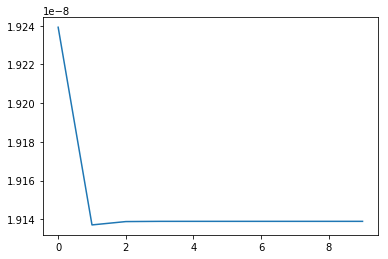

In [208]:
iteraciones = np.linspace(0,iter-1,iter)
print(iteraciones)
plt.plot(iteraciones,Agraph)

In [229]:
V = pd.DataFrame(0,index = index, columns = columns)

In [230]:
for i in range (0,maxL):
    for j in range (0,maxL):
        V.iloc[i][j] = M.iloc[maxL][j]*M.iloc[i][maxL]*A[i]*B[j]*fdef(i,j)

In [288]:
V.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,O
0,801,638,1552,875,673,1129,1693,552,866,728,...,243,302,194,873,501,320,140,759,29,0
1,389,681,1478,634,602,1473,1530,601,928,1207,...,28,329,103,537,259,103,45,23,44,0
2,1686,1454,866,1401,1788,4421,4446,2096,1398,2552,...,774,879,747,1098,616,675,199,954,363,0
3,618,393,1369,269,830,2224,2359,1155,1005,1470,...,247,304,610,881,581,279,349,273,132,0
4,935,489,2365,888,561,2308,2712,1272,896,1036,...,265,492,186,811,363,170,15,516,117,0


In [302]:
rcolumns = ['Origin','Desti','RIJ']
rindex = []
for i in range (0,676):
    rindex.append(str(i))

R = pd.DataFrame( index = rindex, columns = rcolumns)
df_add = pd.DataFrame([[1, 2, 3],[1, 2, 3]], columns=rcolumns)
R.head()
                       
row = 0
for i in range (0,maxL):
    for j in range (0,maxL):
        R.iloc[row] = [i+1, j+1, V.iloc[j,i]]
        row = row + 1
        

In [303]:
R.iloc[670:676,:]

,Origin,Desti,RIJ
670,26,21,1313
671,26,22,357
672,26,23,453
673,26,24,211
674,26,25,1216
675,26,26,174


In [304]:
df_i.iloc[670:676,:]

,ORIGIN,DEST,TIJ,CIJ
670,26,21,541,30
671,26,22,801,24
672,26,23,708,25
673,26,24,368,40
674,26,25,1804,25
675,26,26,1635,21


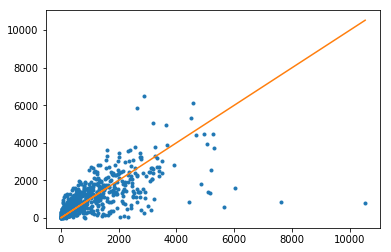

In [315]:
plt.plot(df_i['TIJ'],R['RIJ'],'.')
plt.plot(df_i['TIJ'],df_i['TIJ'])